In [106]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/diamond/klno --filename=out.log --output=../data/diamond-klno.json



In [107]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# use latex globally
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-klno.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
print(kcalmol_to_hartree)

basis = []
nkpt = []
kecut = []
method = []
for d in data:
    # print(d, data[d])
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data[d].get('method', ''))

basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))
method = list(set(method))

nkpt.sort()
kecut.sort()
print(method)

color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

print(basis)

0.0015936254980079682
['rsdf-2.2', 'rsdf-1.4', 'rsdf-2.0', 'rsdf-1.2', 'rsdf-1.8', 'rsdf-1.6', 'rsdf-1.1']
['gth-dzvp']


{'method': 'rsdf-1.6', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 250.0, 'nkpt': 2.0, 'kmesh': '[1, 1, 2]', 'ene_krhf': -10.58181898, 'ene_klno_mp2': -10.63436655, 'ene_klno_ccsd': -10.65560289, 'time_build_df': 39.46, 'time_get_vk': 0.13, 'time_klno': 5.39}
{'method': 'rsdf-1.1', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 457.0, 'nkpt': 2.0, 'kmesh': '[1, 1, 2]', 'ene_krhf': -10.58181942, 'ene_klno_mp2': -10.63436816, 'ene_klno_ccsd': -10.65560353, 'time_build_df': 167.08, 'time_get_vk': 0.11, 'time_klno': 5.51}
{'method': 'rsdf-1.8', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 218.0, 'nkpt': 2.0, 'kmesh': '[1, 1, 2]', 'ene_krhf': -10.58181875, 'ene_klno_mp2': -10.63436545, 'ene_klno_ccsd': -10.65560264, 'time_build_df': 33.92, 'time_get_vk': 0.07, 'time_klno': 4.56}
{'method': 'rsdf-2.0', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 168.0, 'nkpt': 2.0, 'kmesh': '[1, 1, 2]', 'ene_krhf': -10.58181859, 'ene_klno_mp2': -10.63436333, 'ene_klno_

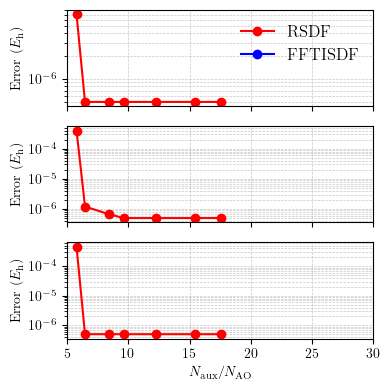

In [111]:
def plot_error_vs_naux(kmesh):
    fig, axs = plt.subplots(3, 1, figsize=(4, 4), sharex=True)

    l = []
    for k, v in data.items():
        if k.split('/')[4] == kmesh:
            l.append(v)
    
    for i, n in enumerate(["ene_krhf", "ene_klno_mp2", "ene_klno_ccsd"]):
        ax = axs[i]
        e_ref = None
        for m in ['rsdf', 'fftisdf-100']:
            l = []

            for k, v in data.items():
                if not v['kmesh'] == str(kmesh):
                    continue
                if m in v["method"]:
                    l.append(v)

            for il in l:
                print(il)

            x = []
            e = []
            for il in l:
                x.append(float(il["naux"]) / float(il["nao"]))
                e.append(il[n])


                if "krhf" in n:
                    

            x = np.array(x)
            e = np.array(e)
            ix = np.argsort(x)
            xx = x[ix]
            
            e = e[ix]
            if e_ref is None:
                e_ref = e[-1]

            yy = [max(1e-6, abs(y)) for y in (e - e_ref)]
            yy = np.array(yy) # float(il["natm"])

            # print(m, n, kmesh, e_ref, e, y)

            ax.semilogy(xx, yy, color=color[m.split('-')[0].upper()], label=m.split('-')[0].upper(), marker='o')
            # ax.set_ylim(-0.001, 0.001)
            ax.set_xlim(5, 30)
            ax.set_ylabel(r'Error ($E_\mathrm{h}$)')

            ax.grid(
                which='both',
                axis='both',
                linestyle='--',
                linewidth=0.5,
                alpha=0.7
            )

            ax.hlines(2 * kcalmol_to_hartree, 5, 30, color='k', linestyle='--', linewidth=0.5, alpha=0.7)
            ax.hlines(-2 * kcalmol_to_hartree, 5, 30, color='k', linestyle='--', linewidth=0.5, alpha=0.7)
    
    axs[-1].set_xlabel(r'$N_{\mathrm{aux}}/N_{\mathrm{AO}}$')
    axs[0].legend(
        loc='upper right',
        bbox_to_anchor=(1, 1),
        ncol=1,
        fontsize=12,
        frameon=False
    )
    
    fig.tight_layout()


plot_error_vs_naux([1, 1, 2])

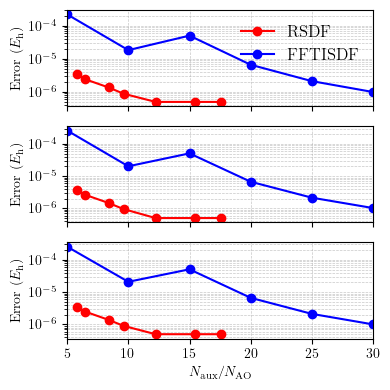

In [ ]:
plot_error_vs_naux("2-2-2")

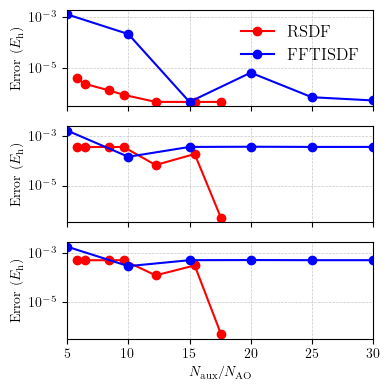

In [103]:
plot_error_vs_naux("2-2-3")

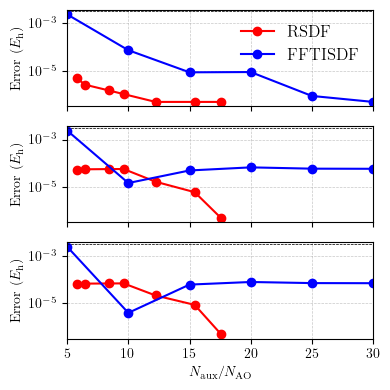

In [98]:
plot_error_vs_naux("4-4-4")